## Projet Deep Learning : Reconnaissance d'images de pays
## **Exploration des données**

#### Dataset: 
Google Landmarks Dataset v2 :
https://github.com/cvdfoundation/google-landmark?tab=readme-ov-file


#### Objectif du projet :
<p style="text-align: justify;">
    L'objectif de ce projet est de développer une solution de Deep Learning pour la reconnaissance d'images. L'input sera une image d'un lieu, et la sortie du modèle sera le pays correspondant, accompagnée de probabilités d'appartenance.
</p>


In [42]:
# Packages
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import folium
import geopandas as gpd

In [2]:
# Variables globales
DATA_TRAIN_PATH = "data/train"

### Importation des données

#### Labels et metadonnées

**train.csv** : id, url, id du lieu associés à un id d'image

In [3]:
train_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train.csv")
print(train_df.size)

12398742


**train_attribution.csv** : id, url, auteur, titre associés à un id d'image

In [4]:
train_attribution_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_attribution.csv")
train_attribution_df.head()

id                                                url  \
0  6e158a47eb2ca3f6  http://commons.wikimedia.org/wiki/File:Observa...   
1  202cd79556f30760  http://commons.wikimedia.org/wiki/File:Ecosse2...   
2  3ad87684c99c06e1  http://commons.wikimedia.org/wiki/File:Pirmase...   
3  e7f70e9c61e66af3  http://commons.wikimedia.org/wiki/File:Occiden...   
4  4072182eddd0100e  http://commons.wikimedia.org/wiki/File:Looking...   

                                      author  \
0                            Holger.Ellgaard   
1                                 LeCardinal   
2                                   LoKiLeCh   
3                              Andrés Osorio   
4  Stephen Whittaker and Katharine Oakeshott   

                                             license  \
0  CC BY-SA 3.0(http://creativecommons.org/licens...   
1  CC-BY-SA-3.0(http://creativecommons.org/licens...   
2  GFDL(http://www.gnu.org/copyleft/fdl.html)/CC-...   
3  CC BY 2.0(http://creativecommons.org/licenses/...   
4  CC BY-SA 2.0(https://creativecommons.org/licen...   

                                               title  
0           File:Observatoriet väderkammer 2013a.jpg  
1                            File:Ecosse200996-1.jpg  
2                       File:Pirmasens Dynamikum.jpg  
3                       File:Occidental Vertical.jpg  
4  File:Looking downstream from the footbridge ov...

**train_clean.csv** : id des images associées à un id de lieu

In [5]:
train_clean_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_clean.csv")
train_clean_df.head()

landmark_id                                             images
0            1  17660ef415d37059 92b6290d571448f6 cd41bf948edc...
1            7  25c9dfc7ea69838d 28b13f94a6f1f3c1 307d6584f473...
2            9  0193b65bb58d2c77 1a30a51a287ecf69 1f4e8ab1f1b2...
3           11  1a6cb1deed46bb17 1cc2c8fbc83e1a0c 2361b8da868c...
4           12  0a199c97c382b1ff 1492a5d344495391 290097bd36a6...

**train_label_to_category.csv** : page wikipedia associée à chaque id de lieu

In [6]:
train_label_to_category_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_label_to_category.csv")
train_label_to_category_df

landmark_id                                           category
0                 0  http://commons.wikimedia.org/wiki/Category:Hap...
1                 1  http://commons.wikimedia.org/wiki/Category:Lui...
2                 2  http://commons.wikimedia.org/wiki/Category:Gra...
3                 3  http://commons.wikimedia.org/wiki/Category:Twe...
4                 4  http://commons.wikimedia.org/wiki/Category:San...
...             ...                                                ...
203089       203089  http://commons.wikimedia.org/wiki/Category:Isa...
203090       203090  http://commons.wikimedia.org/wiki/Category:Mar...
203091       203091  http://commons.wikimedia.org/wiki/Category:Sil...
203092       203092  http://commons.wikimedia.org/wiki/Category:Hoa_Lu
203093       203093  http://commons.wikimedia.org/wiki/Category:Sto...

[203094 rows x 2 columns]

**train_label_to_hierarchical.csv** : supercatégories et autres variables associées à chaque id de lieu

In [7]:
train_label_to_hierarchical_df = pd.read_csv(f"{DATA_TRAIN_PATH}/train_label_to_hierarchical.csv")
train_label_to_hierarchical_df.head()

landmark_id                                           category  \
0            0  http://commons.wikimedia.org/wiki/Category:Hap...   
1            1  http://commons.wikimedia.org/wiki/Category:Lui...   
2            2  http://commons.wikimedia.org/wiki/Category:Gra...   
3            5  http://commons.wikimedia.org/wiki/Category:Lak...   
4            7  http://commons.wikimedia.org/wiki/Category:Spa...   

             supercategory hierarchical_label natural_or_human_made  
0       horse racing venue       sports venue            human-made  
1                     park              parks               natural  
2                 mountain           mountain               natural  
3  motorsport racing track               road            human-made  
4       multi-purpose hall                NaN                   NaN

**category_to_location.csv** : villes,pays, coordonnées géo associés à chaque id de lieu

In [20]:
category_to_location_df = pd.read_csv(f"{DATA_TRAIN_PATH}/category_to_location.csv")
print(category_to_location_df.shape)
category_to_location_df.head()

(35070, 8)


id                          category_name                             name  \
0   0       Category:Happy_Valley_Racecourse  Natural Turf Soccer Pitch No. 5   
1   1        Category:Luitpoldpark_in_Munich                              NaN   
2   3  Category:Tweed_Heads,_New_South_Wales         Ukerebagh Nature Reserve   
3  14             Category:Delacorte_Theater                Delacorte Theater   
4  15  Category:Tremper_Mound_and_Earthworks                    Tremper Mound   

         lat         lon              city            state        country  
0  22.272800  114.182000  Hong Kong Island        Hong Kong          China  
1  48.171494   11.569674            Munich          Bavaria        Germany  
2 -28.183300  153.550000       Tweed Heads  New South Wales      Australia  
3  40.780100  -73.968767          New York         New York  United States  
4  38.801300  -83.010600               NaN             Ohio  United States

#### Images

Importation d'images issues du foder images_000/.

**Exemple d'images :**

000a0aee5e90cbaf

000cf8d915e66273

0002dfd441c8bb85

000adb02777b5bc9

In [13]:
exemple_image_id = '000a0aee5e90cbaf'

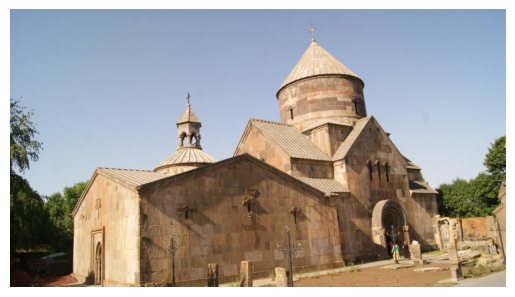

In [14]:
image_path = f'images_000/0/0/0/{exemple_image_id}.jpg'
image = Image.open(f"{DATA_TRAIN_PATH}/{image_path}")

# plot de l'image
plt.imshow(image)
plt.axis('off')
plt.show()


In [15]:
train_attribution_df[train_attribution_df['id'] == exemple_image_id]

id                                                url  \
2112010  000a0aee5e90cbaf  http://commons.wikimedia.org/wiki/File:%D4%BF%...   

           author                                            license  \
2112010  Vahag851  CC BY-SA 3.0(http://creativecommons.org/licens...   

                      title  
2112010  File:Կեչառիս28.JPG

Pour obtenir la supercategory de l'image, faire le croisement avec train_df :

In [16]:
exemple_landmark_id = train_df[train_df['id'] == exemple_image_id]['landmark_id'].iloc[0]
exemple_row = train_label_to_hierarchical_df[train_label_to_hierarchical_df['landmark_id'] == exemple_landmark_id]
exemple_category = exemple_row['category']
print('url du lieu : ',exemple_category.iloc[0])
exemple_row

url du lieu :  http://commons.wikimedia.org/wiki/Category:Kecharis


landmark_id                                           category  \
23198        36748  http://commons.wikimedia.org/wiki/Category:Kec...   

      supercategory hierarchical_label natural_or_human_made  
23198     Q42952285                NaN                   NaN

#### Géolocalisations

Carte du monde :
Exemples de lieux à partir des coordonnées géographiques (lat, long)

In [32]:
m = folium.Map(location=[48.8575, 2.3514], zoom_start=2)


for _, row in category_to_location_df.sample(n=1000, random_state=1).iterrows():
    if pd.notna(row["lat"]) and pd.notna(row["lon"]):
        folium.CircleMarker(
            location=[row["lat"], row["lon"]],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"{row['name']} - {row['city']}, {row['state']}, {row['country']}",
            tooltip=row["name"],
        ).add_to(m)


display(m)

Carte d'un pays :
Ensemble des lieux à partir des coordonnées géographiques (lat, long)

In [38]:
country = 'France'

In [39]:
category_to_location_filtered_df = category_to_location_df[category_to_location_df['country'] == country]

m = folium.Map(location=[category_to_location_filtered_df["lat"].mean(), category_to_location_filtered_df["lon"].mean()], zoom_start=5)

for _, row in category_to_location_filtered_df.iterrows():
    if pd.notna(row["lat"]) and pd.notna(row["lon"]):
        folium.CircleMarker(
            location=[row["lat"], row["lon"]],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{row['name']} - {row['city']}, {row['state']}, {row['country']}",
            tooltip=row["name"],
        ).add_to(m)


display(m)

Données des lieux agrégées par pays

In [ ]:
# nombre de lieux par pays
category_to_location_agg_df = category_to_location_df['country'].value_counts().reset_index()
category_to_location_agg_df.columns = ['country', 'nb_places']
category_to_location_agg_df.head()

country  nb_places
0   United States       5090
1         Germany       4079
2  United Kingdom       2979
3           Italy       2759
4          France       2652

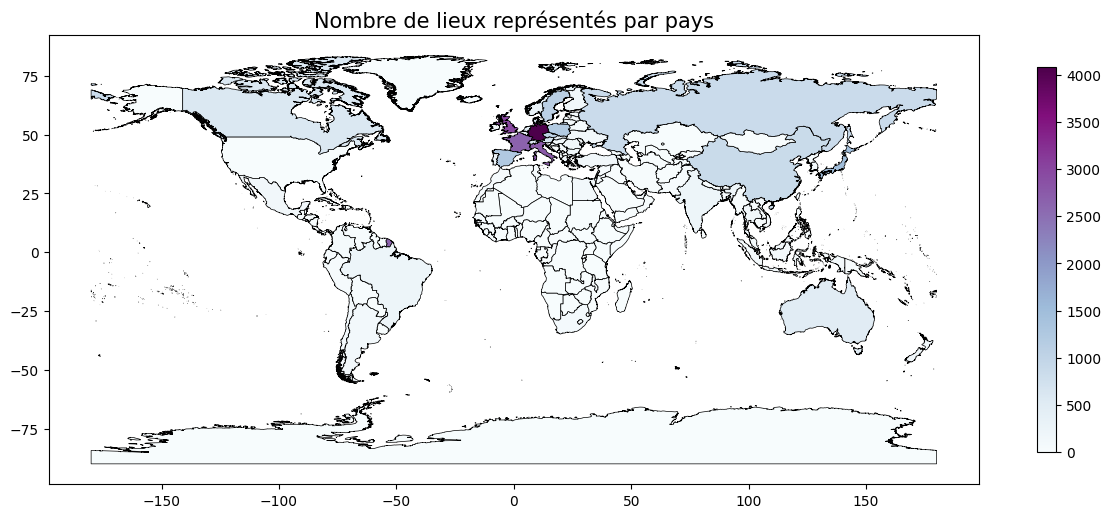

In [62]:
# merge des données agrégées avec le shapefile de la carte du monde
shapefile_path = "data/shapefiles/ne_10m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
world = world.merge(category_to_location_agg_df, how='left', left_on='NAME', right_on='country')
world['nb_places'] = world['nb_places'].fillna(0)

# plot de la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='nb_places', cmap='BuPu', linewidth=0.5, edgecolor='black', 
           legend=True, ax=ax, legend_kwds={'shrink': 0.5})
ax.set_title("Nombre de lieux représentés par pays", fontsize=15)
plt.show()